## Clustering Assignment
                                -Jeevak

## Overview: 
#### The international humanitarian NGO HELP have been able to raise 10million USD to fight poverty. The CEO wants to use this money strategically and effectively, hence they need to identify the countries in the direst need of aid.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings("ignore") 

In [3]:
# read the dataset
cntry_df = pd.read_csv("Country-data.csv")
cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
cntry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
cntry_df.shape

(167, 10)

In [6]:
cntry_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
100*(cntry_df.isna().sum().sort_values(ascending=False))

gdpp          0
total_fer     0
life_expec    0
inflation     0
income        0
imports       0
health        0
exports       0
child_mort    0
country       0
dtype: int64

## There does not seem to be any null values here in this dataset.

In [8]:
#to transform data under health, imports and exports
cntry_df['exports']=((cntry_df['exports']*cntry_df['gdpp'])/100)
cntry_df['health']=((cntry_df['health']*cntry_df['gdpp'])/100)
cntry_df['imports']=((cntry_df['imports']*cntry_df['gdpp'])/100)
cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
cntry_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Univariate & Multivariate analaysis

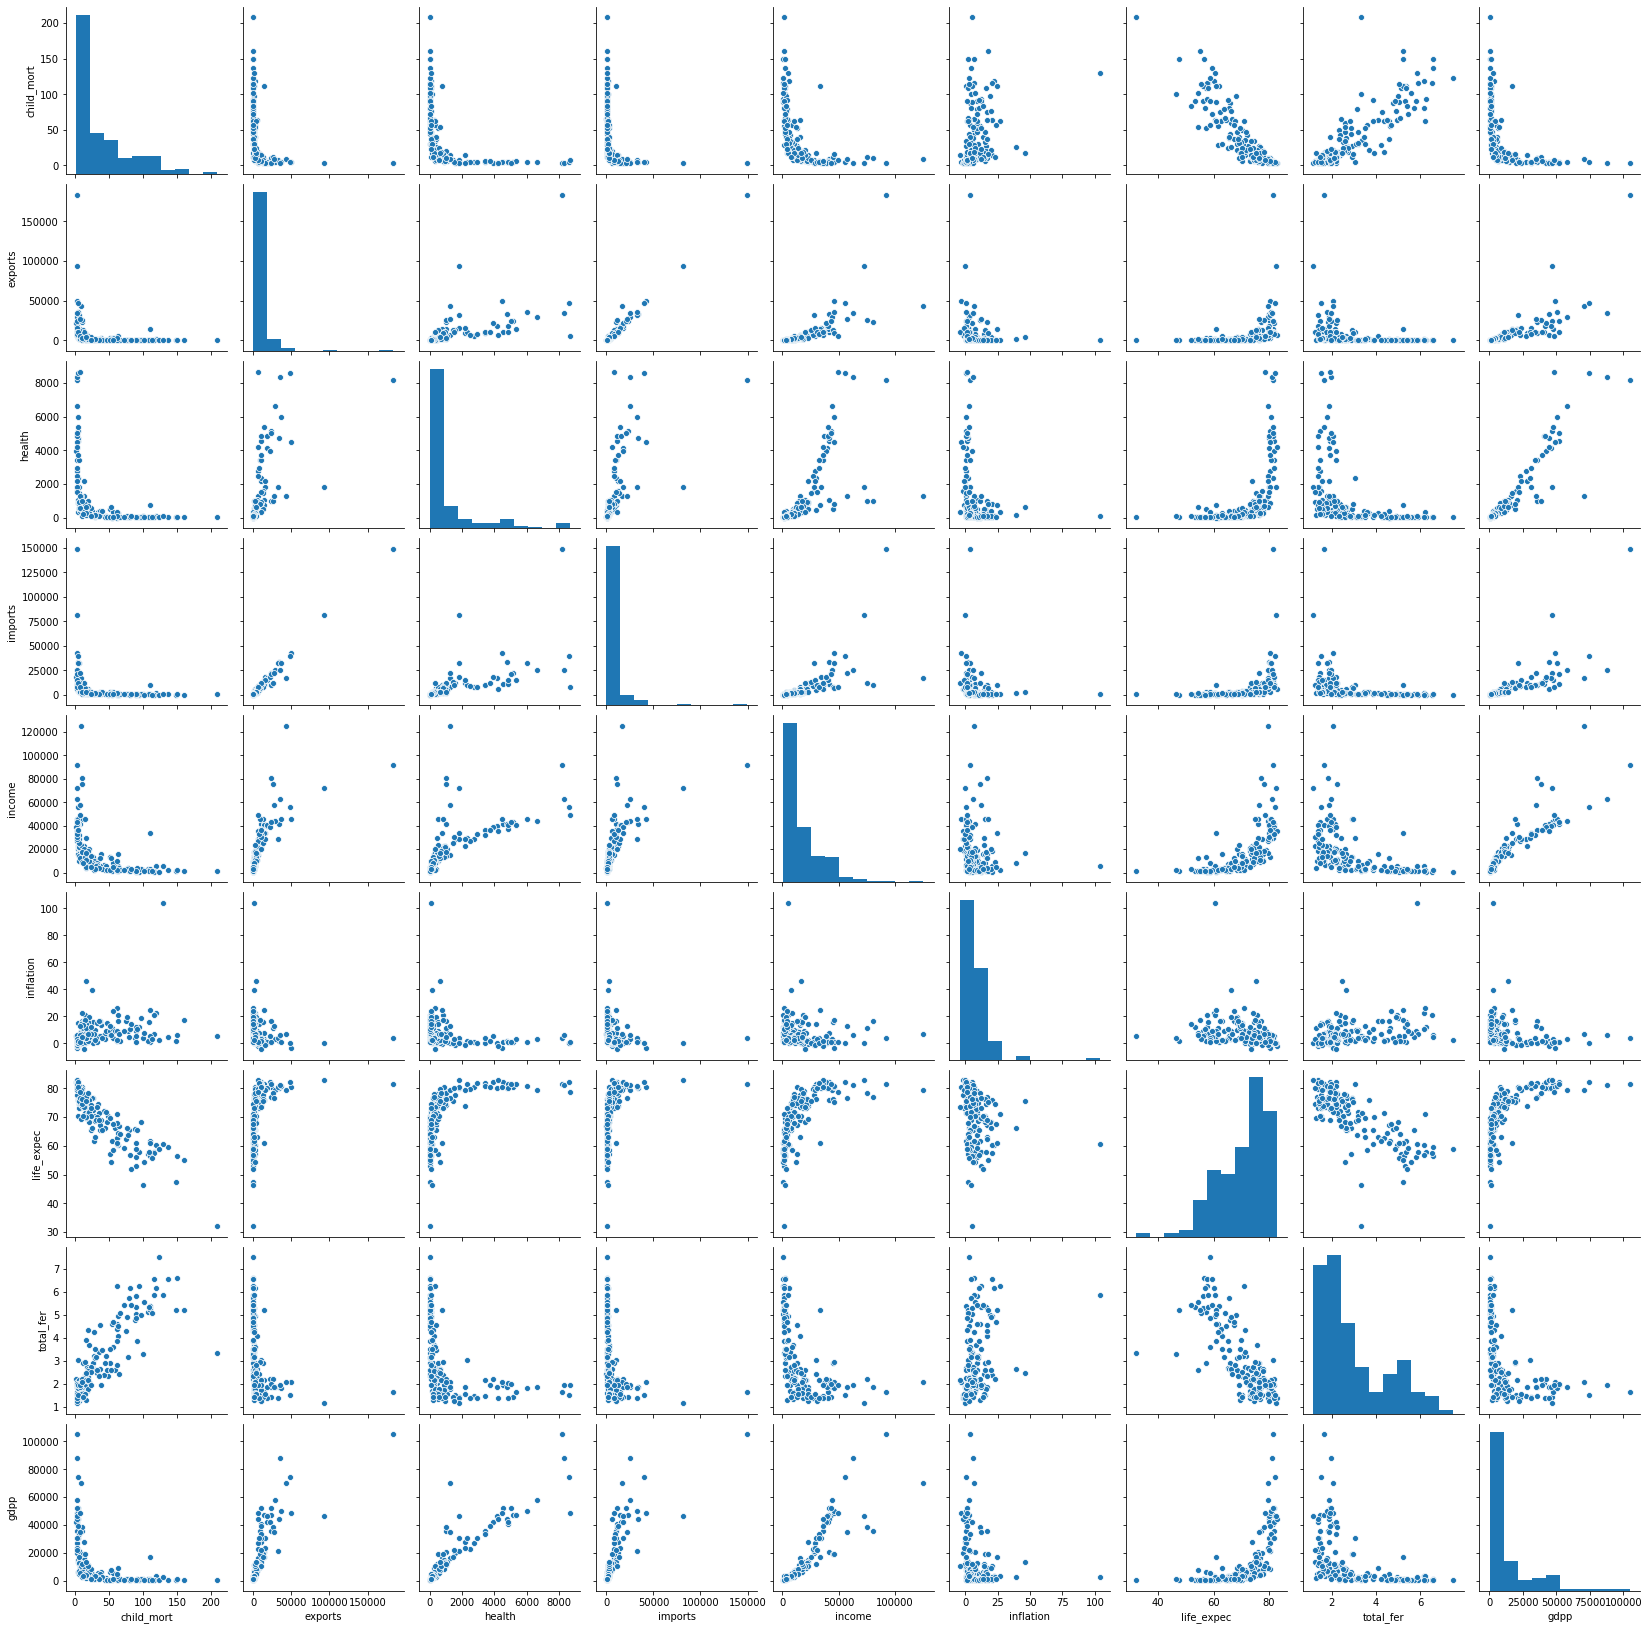

In [10]:
sns.pairplot(cntry_df)
plt.show()

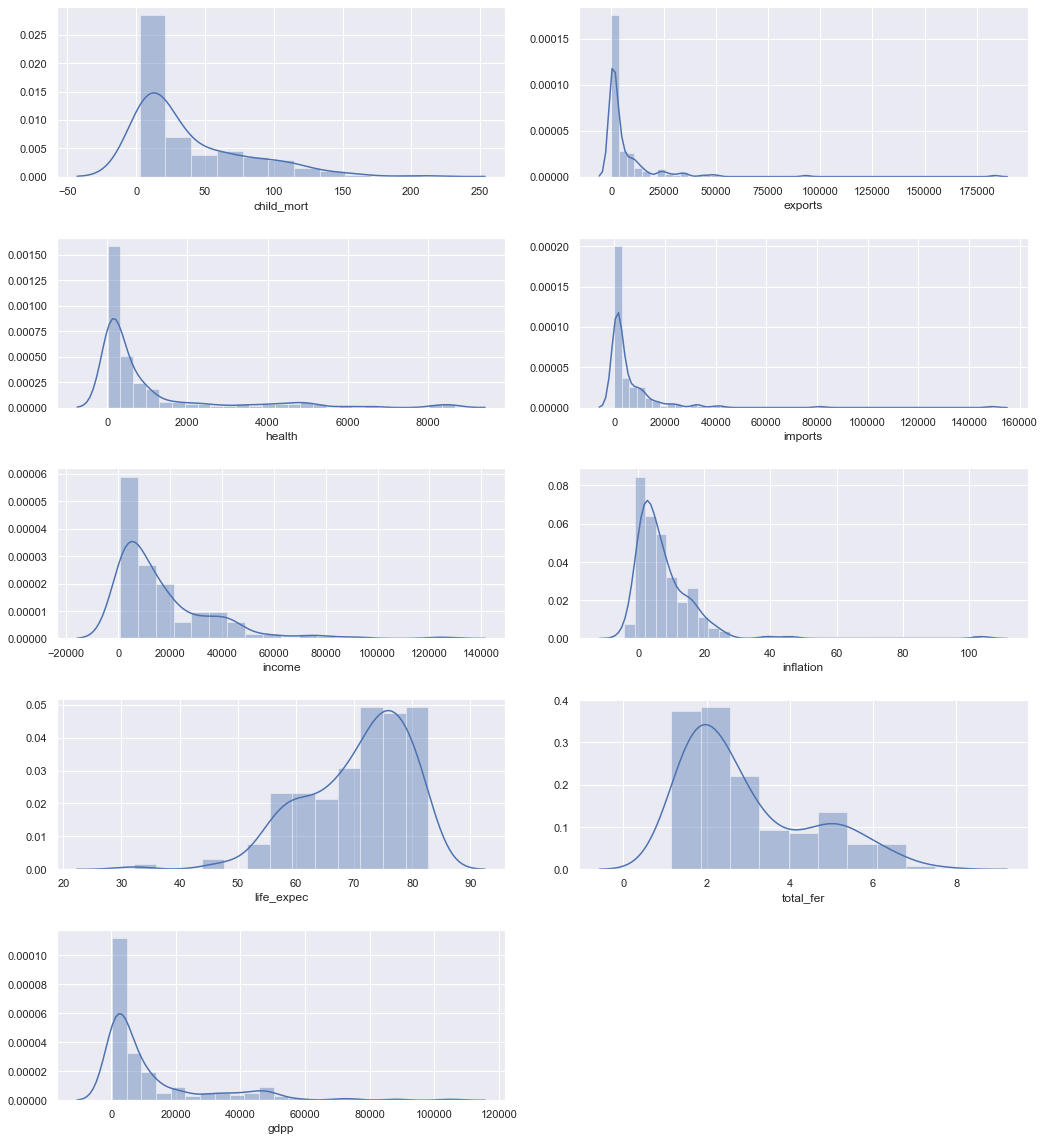

In [11]:
features1 =['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize = (15,80))
sns.set(font_scale=1)
for i in enumerate(features1):
           plt.subplot(25,2,i[0]+1)
           sns.distplot(cntry_df[i[1]], hist = True)
plt.tight_layout(pad=2)         


### We can see that the variables except " total_fer" show signs of outliers here. We need to check more to verify that. 

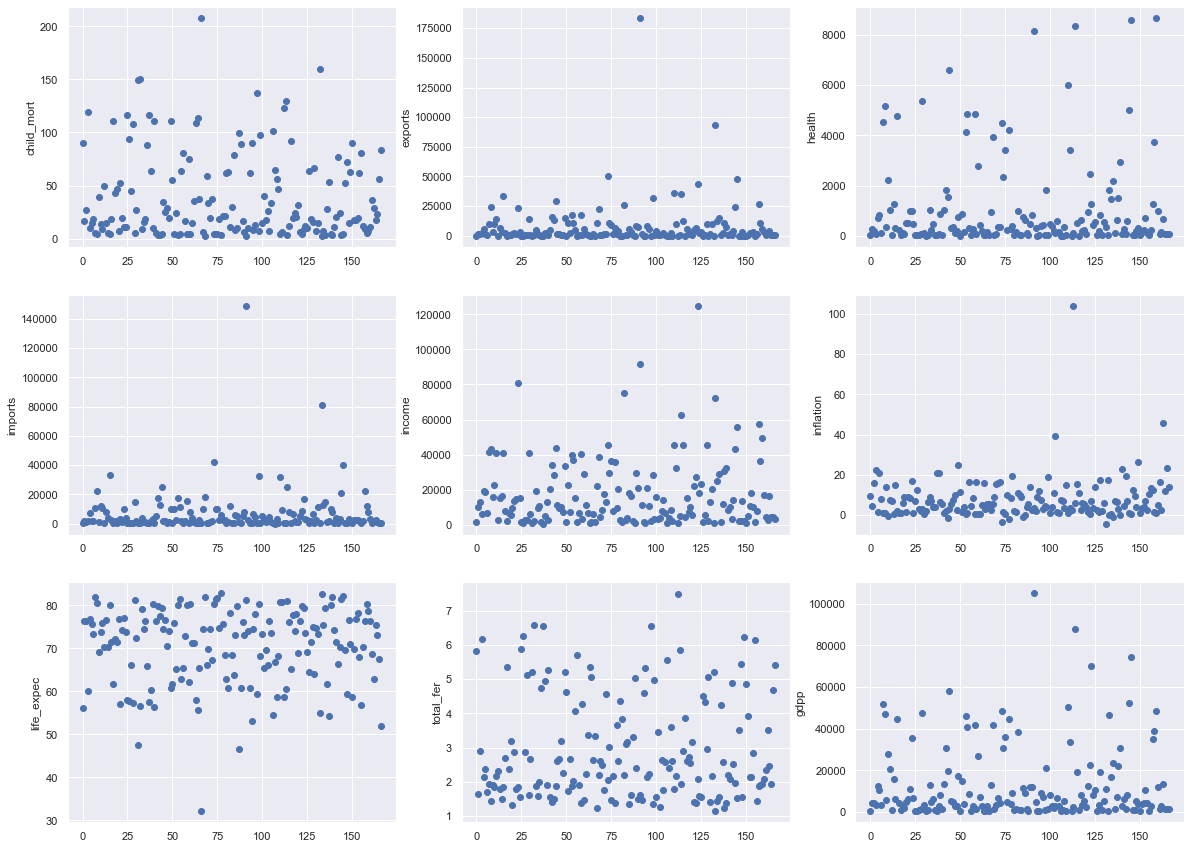

In [12]:
#To check for outliers using scatterplots
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
plt.scatter(cntry_df.index, cntry_df['child_mort'])
plt.ylabel("child_mort") 
plt.subplot(3,3,2)
plt.scatter(cntry_df.index, cntry_df['exports'])
plt.ylabel("exports")
plt.subplot(3,3,3)
plt.scatter(cntry_df.index, cntry_df['health'])
plt.ylabel("health")
plt.subplot(3,3,4)
plt.scatter(cntry_df.index, cntry_df['imports'])
plt.ylabel("imports")
plt.subplot(3,3,5)
plt.scatter(cntry_df.index, cntry_df['income'])
plt.ylabel("income")
plt.subplot(3,3,6)
plt.scatter(cntry_df.index, cntry_df['inflation'])
plt.ylabel("inflation")
plt.subplot(3,3,7)
plt.scatter(cntry_df.index, cntry_df['life_expec'])
plt.ylabel("life_expec")
plt.subplot(3,3,8)
plt.scatter(cntry_df.index, cntry_df['total_fer'])
plt.ylabel("total_fer")
plt.subplot(3,3,9)
plt.scatter(cntry_df.index, cntry_df['gdpp'])
plt.ylabel("gdpp")
plt.show()

### We can see here that variables like "exports, imports, income and inflation" exhibit signs of having outliers. 

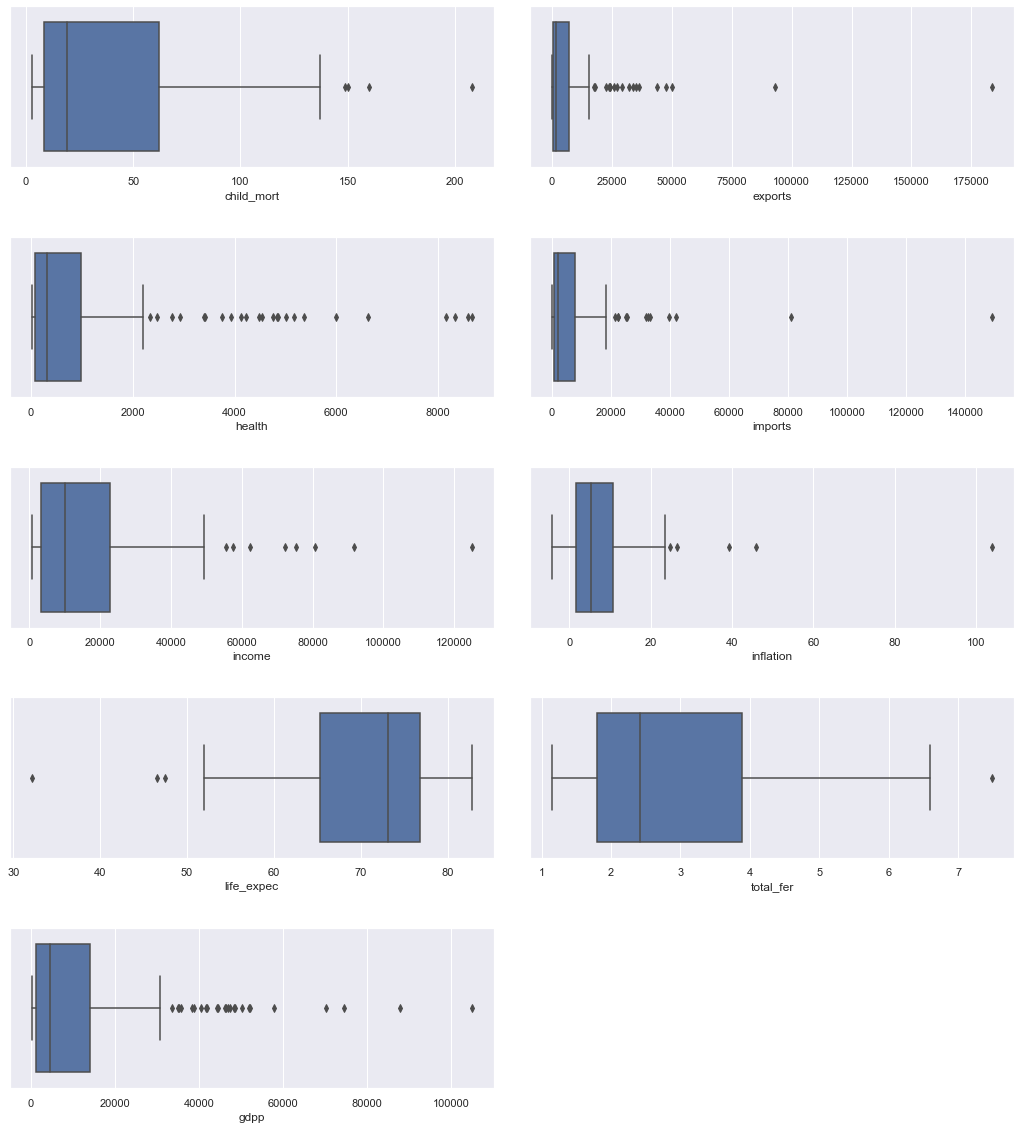

In [13]:
#To check for outliers using boxplots
features1 =['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize = (15,80))
sns.set(font_scale=1)
for i in enumerate(features1):
           plt.subplot(25,2,i[0]+1)
           sns.boxplot(cntry_df[i[1]])
plt.tight_layout(pad=3) 

#### We can see that almost all the variables have outliers here. But imports, health and exports seem to be variables heavily affected by it. This might affect our eventual model hence capping them would be more suitable. Even the "total_fer" variable can do with capping at the higher end. Again since our motive is to find countries in need of financial aid so the countries with higher GDP can also be capped.

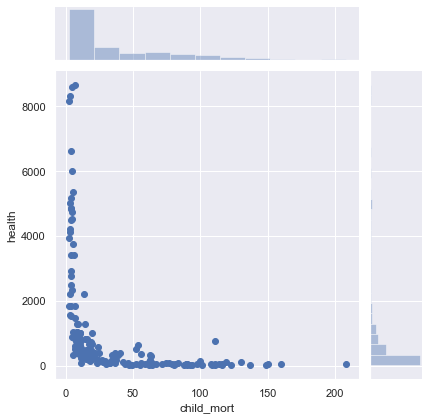

In [14]:
#to check the relationship between child_mortality and spending on health.
sns.jointplot('child_mort', 'health', cntry_df)
plt.show()

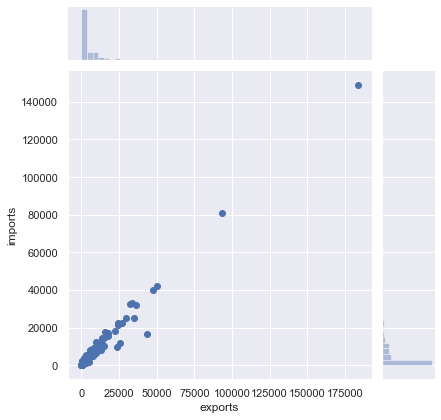

In [15]:
#to check the relationship between imports and exports
sns.jointplot('exports', 'imports', cntry_df)
plt.show()

In [16]:
#to inspect the imports, life_expec and exports column
print(cntry_df.imports.quantile([0.01, 0.20, 0.50, 0.75, 0.90,0.99,1]))
print(cntry_df.exports.quantile([0.01, 0.20, 0.50, 0.75, 0.90,0.99,1]))
print(cntry_df.life_expec.quantile([0.01, 0.20, 0.50, 0.75, 0.90,0.99]))

0.01       104.90964
0.20       409.99880
0.50      2045.58000
0.75      7719.60000
0.90     15034.28000
0.99     55371.39000
1.00    149100.00000
Name: imports, dtype: float64
0.01        22.243716
0.20       294.268000
0.50      1777.440000
0.75      7278.000000
0.90     17760.600000
0.99     64794.260000
1.00    183750.000000
Name: exports, dtype: float64
0.01    47.16
0.20    61.88
0.50    73.10
0.75    76.80
0.90    80.40
0.99    82.37
Name: life_expec, dtype: float64


In [17]:
#to cap the outliers

q1 = cntry_df['exports'].quantile(0.85)
q2 = cntry_df['health'].quantile(0.90)
q3 = cntry_df['imports'].quantile(0.90)
q4 = cntry_df['income'].quantile(0.99)
q5 = cntry_df['inflation'].quantile(0.99)
q6 = cntry_df['total_fer'].quantile(0.99)
q7 = cntry_df['gdpp'].quantile(0.99)

cntry_df['exports'][cntry_df['exports']>=q1] = q1
cntry_df['health'][cntry_df['health']>=q2] = q2
cntry_df['imports'][cntry_df['imports']>=q3] = q3
cntry_df['income'][cntry_df['income']>=q4] = q4
cntry_df['inflation'][cntry_df['inflation']>=q5] = q5
cntry_df['total_fer'][cntry_df['total_fer']>=q6] = q6
cntry_df['gdpp'][cntry_df['gdpp']>=q7] = q7





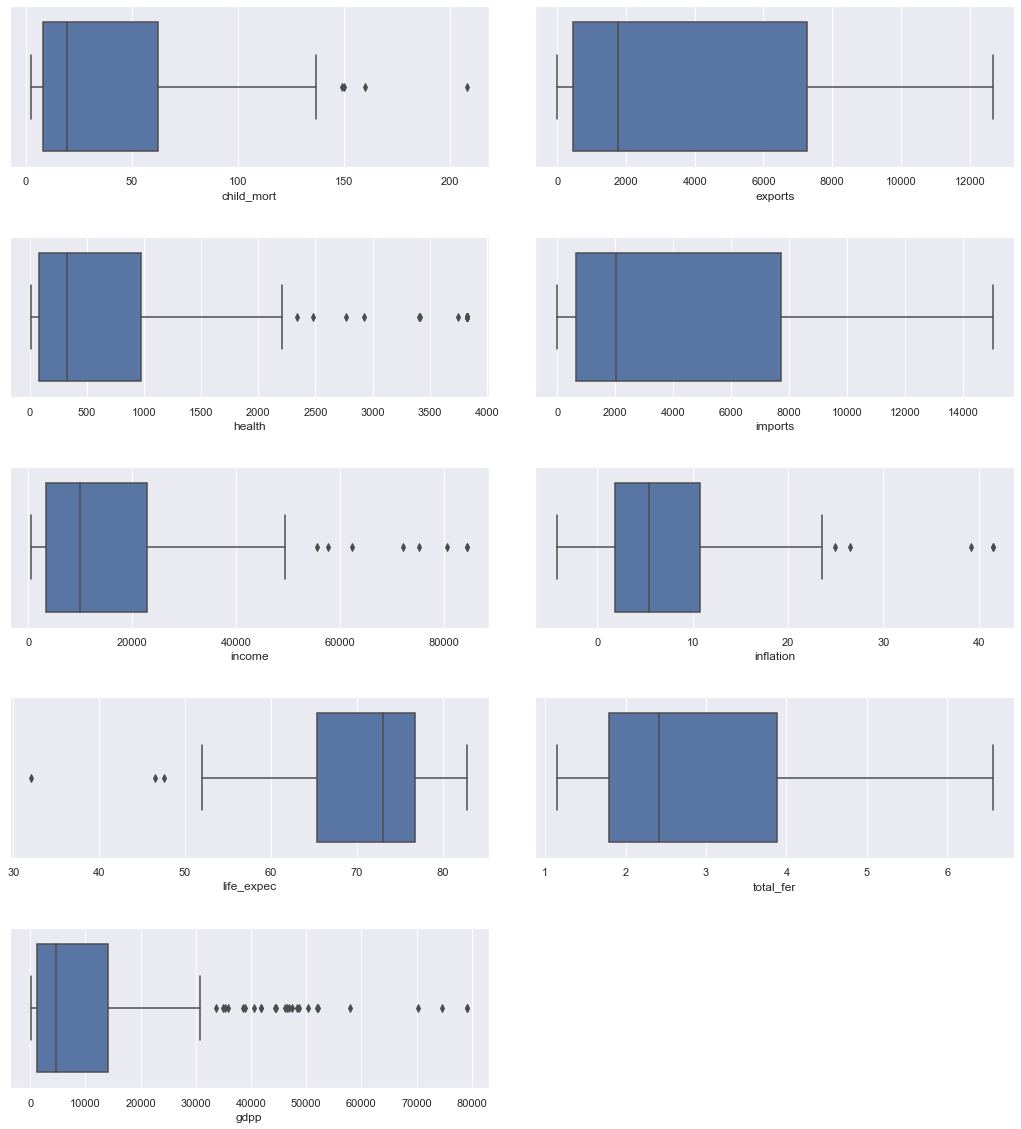

In [18]:
#to verify the capping for outlier
features1 =['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize = (15,80))
sns.set(font_scale=1)
for i in enumerate(features1):
           plt.subplot(25,2,i[0]+1)
           sns.boxplot(cntry_df[i[1]])
plt.tight_layout(pad=3) 

### Now that capping is done, the next step would be to check the Hopkins Statistics to check cluster tendency.

In [19]:
#to scale the variables before using Hopkins Statistics
test_df=cntry_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
scaler=StandardScaler()
test_df_scaled=scaler.fit_transform(test_df)
test_df_scaled.shape

(167, 9)

In [20]:
#to convert the array to a dataframe
test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
test_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.878139,-0.676933,-0.841497,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.642962,-0.490352,-0.493824,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.520521,-0.557985,-0.611211,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.415535,-0.628477,-0.588439,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,0.307712,-0.104136,0.545147,0.125254,-0.764618,0.704258,-0.543736,-0.032042


In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(test_df_scaled)

0.845915497710683

### Since the value of hopkins statistic lies between 0.7 and 0.99, hence it has a higher tendency to cluster.

## MODELLING-Elbow & Silhouette Score

In [23]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=50)
kmeans.fit(test_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [24]:
kmeans.labels_

array([2, 0, 0, 2, 3, 0, 0, 1, 1, 0, 3, 3, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 3, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 1, 2, 2, 0, 1, 2, 3, 0, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 3, 0, 2,
       2, 3, 3, 1, 0, 2, 2, 3, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 0, 3, 3, 1, 0, 0, 2, 0, 3, 2, 0, 3,
       2, 1, 3, 3, 0, 0, 3, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

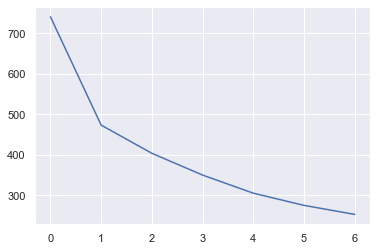

In [25]:
#to check the elbow curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(test_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Going by this we can see that the drop from 0-1 is quite steep,  similarly for 1-2 it is sort of significant. But the drop from 2-3 is not-so-significant and 3 seems to be a good number for us here. 

In [26]:
#silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=50)
    kmeans.fit(test_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(test_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4877128312477322
For n_clusters=3, the silhouette score is 0.41999139010395775
For n_clusters=4, the silhouette score is 0.359698389544532
For n_clusters=5, the silhouette score is 0.36173477121641867
For n_clusters=6, the silhouette score is 0.2963176991094987
For n_clusters=7, the silhouette score is 0.3029809684168995
For n_clusters=8, the silhouette score is 0.31361046785147134


### We see here that the score for 4 clusters decreases a lot. Hence, it would be fair to stick to 3 clusters.

In [27]:
#for final model we select k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=50)
kmeans.fit(test_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [28]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [29]:
cntry_df['cluster_id'] = kmeans.labels_
cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


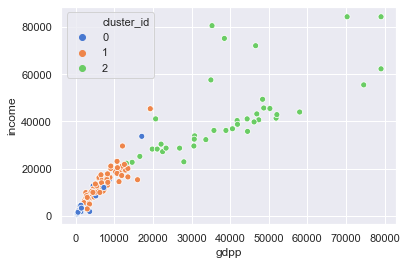

In [30]:
# We can see here that countries in cluster 0 have low income and low GDP. Also, it can be seen that earning or income of an individual contributes significantly to the increase or decrease in gdp.
sns.scatterplot(x='gdpp', y='income', hue="cluster_id", data=cntry_df, palette="muted")

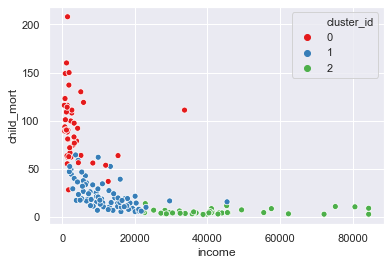

In [31]:
#We can see clearly that the child mortality is higher in Cluster 0 amd income is really low. Income is a major contributor to mortality rates of child.
sns.scatterplot(x='income', y='child_mort', hue="cluster_id", data=cntry_df, palette="Set1")

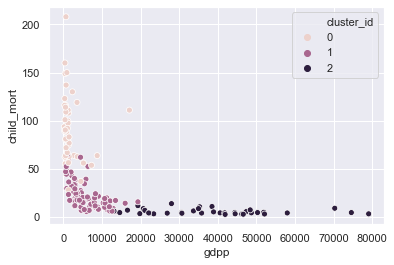

In [32]:
#We can see here that countries in cluster 0 have high mortality rates and low Gdp. 
sns.scatterplot(x='gdpp', y='child_mort', hue="cluster_id", data=cntry_df)

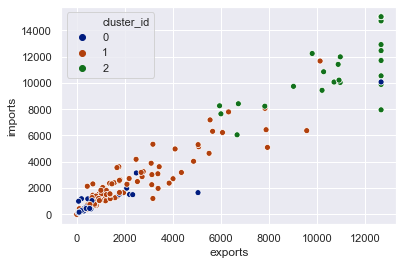

In [33]:
#We can see here clearly that countries in cluster 0 have really low import and export ratio.
sns.scatterplot(x='exports', y='imports', hue="cluster_id", data=cntry_df, palette="dark")

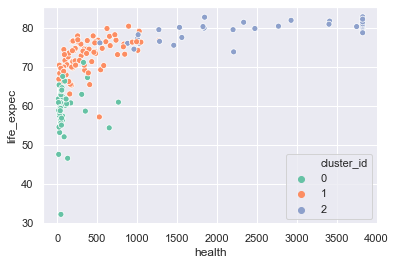

In [34]:
#We can clearly see how countries in cluster 0 have lower life-expectancy and also they spend less on health.
sns.scatterplot(x='health', y='life_expec', hue="cluster_id", data=cntry_df, palette="Set2")

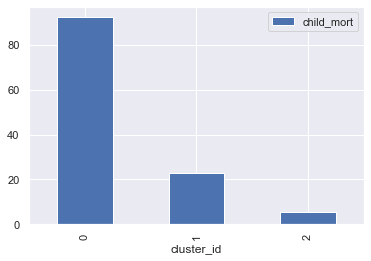

In [35]:
#We can identify the cluster with the highest mortality rate.
cntry_df[['child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind="bar")

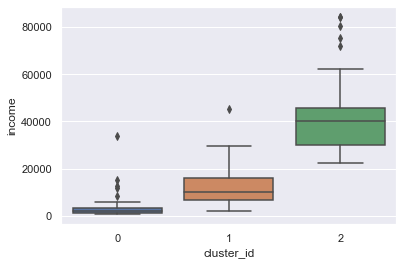

In [36]:
#We can identify the cluster with the lowest income here.
sns.boxplot(x='cluster_id', y='income', data=cntry_df)

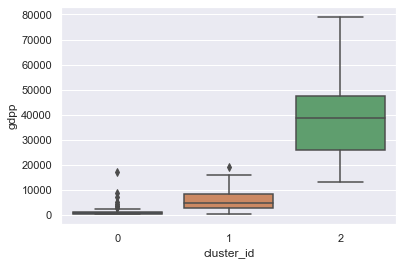

In [37]:
#We can clearly see that although both cluster 0 and 1 have low GDP but 0 has a much lower GDP than 1.
sns.boxplot(x='cluster_id', y='gdpp', data=cntry_df)

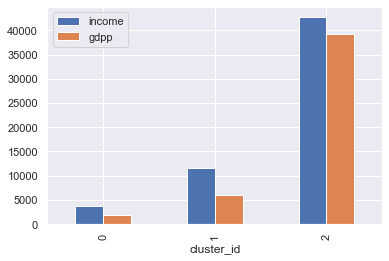

In [38]:
#We can see that Cluster 0 has low income and gdp
cntry_df[['income','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind="bar")

### Through all the visualizations we can deduce that the countries in Cluster 0 require financial aid.

## Hierarchial Clustering

In [39]:
test_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.878139,-0.676933,-0.841497,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.642962,-0.490352,-0.493824,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.520521,-0.557985,-0.611211,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.415535,-0.628477,-0.588439,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,0.307712,-0.104136,0.545147,0.125254,-0.764618,0.704258,-0.543736,-0.032042


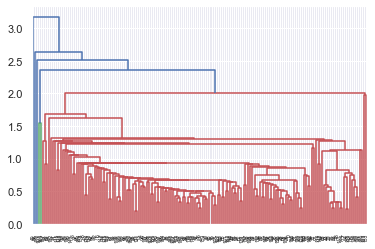

In [40]:
#single linkage
mergings = linkage(test_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

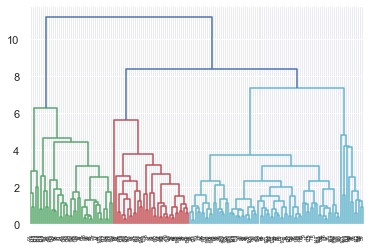

In [41]:
#complete linkage
mergings = linkage(test_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [42]:
#If we stick to the threshold of 6.5 we can assign 4 cluster labels here.
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 3, 0, 2, 1, 2, 2, 3, 0, 1, 2, 3, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 3, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 3, 1, 2, 2, 1, 0, 1, 3, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 3, 1, 3, 0])

In [43]:
#assign cluster labels
cntry_df['cluster_labels'] = cluster_labels
cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


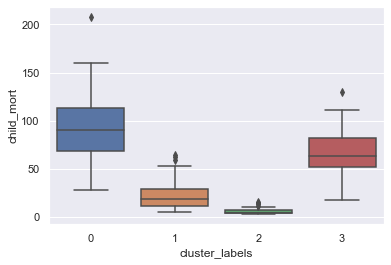

In [44]:
#We can see that cluster 0 has the highest mortality rate here. 
sns.boxplot(x='cluster_labels', y='child_mort', data=cntry_df)

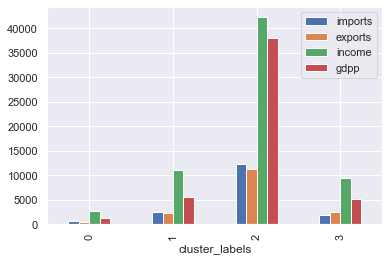

In [45]:
#We can see that Cluster 0 has the lowest imports, exports and income which eventually leads to low gdp.
cntry_df[['imports','exports','income','gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind="bar")

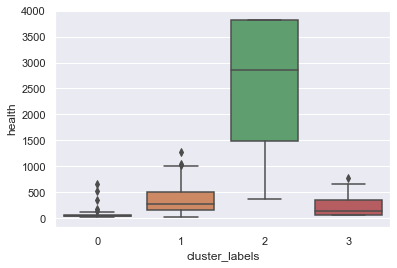

In [46]:
#We can see that the countries in Cluster 0 have the lowest spending on health.
sns.boxplot(x='cluster_labels', y='health', data=cntry_df)

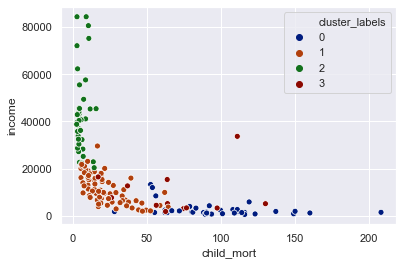

In [47]:
#We can see here the relationship between child_mort and income. 
sns.scatterplot(x='child_mort', y='income', hue="cluster_labels", data=cntry_df, palette="dark")

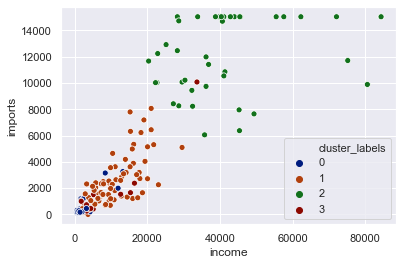

In [48]:
#We can see here the relationship between income and imports. 
sns.scatterplot(x='income', y='imports', hue="cluster_labels", data=cntry_df, palette="dark")

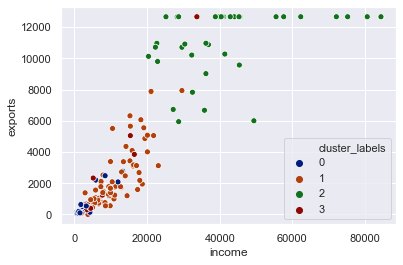

In [49]:
#We can see here the relationship between exports and income. 
sns.scatterplot(x='income', y='exports', hue="cluster_labels", data=cntry_df, palette="dark")

### We can deduce here that the countries in Cluster 0 require financial aid.

In [50]:
#to check frequency of clusters through K-means clustering
cntry_df.cluster_id.value_counts()

1    80
0    47
2    40
Name: cluster_id, dtype: int64

In [51]:
#to check frequency of clusters through hierarchial clustering
cntry_df.cluster_labels.value_counts()

1    75
2    42
0    38
3    12
Name: cluster_labels, dtype: int64

### Cluster profiling to find countries within a specific cluster for both K-means clustering and hierarchial clustering

In [52]:
#to store countries with high child mortality as per K-means clustering
df_child_mor=cntry_df[cntry_df['cluster_id']==0]
df_child_mor=df_child_mor.sort_values(by=['child_mort'], ascending=False).head(5)

In [53]:
#to store countries with low Gdp as per K-means clustering
df_gdpp=cntry_df[cntry_df['cluster_id']==0]
df_gdpp=df_gdpp.sort_values(by=['gdpp'], ascending=True).head(5)

In [54]:
#to store countries with low income as per K-means clustering
df_incm=cntry_df[cntry_df['cluster_id']==0]
df_incm=df_incm.sort_values(by=['income'], ascending=True).head(5)

In [60]:
#to compile the final list of coutries that need financial wrt K-means clustering
df_id = pd.concat([df_gdpp,df_incm,df_child_mor])
df_id.drop_duplicates().sort_values(by=['life_expec'], ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0,0
97,Mali,137.0,161.4240,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0,0


In [56]:
#to store countries with high child mortality as per hierarchial clustering
df_child_mor2=cntry_df[cntry_df['cluster_labels']==0]
df_child_mor2=df_child_mor2.sort_values(by=['child_mort'], ascending=False).head(5)

In [57]:
#to store countries with low gdpp as per hierarchial clustering
df_gdpp2=cntry_df[cntry_df['cluster_labels']==0]
df_gdpp2=df_gdpp2.sort_values(by=['gdpp'], ascending=True).head(5)

In [58]:
#to store countries with low income as per hierarchial clustering
df_incm2=cntry_df[cntry_df['cluster_labels']==0]
df_incm2=df_incm2.sort_values(by=['income'], ascending=True).head(5)

In [59]:
#to compile the final list of coutries that need financial aid wrt hierarchial clustering
df_label = pd.concat([df_gdpp2,df_incm2,df_child_mor2])
df_label.drop_duplicates().sort_values(by=['life_expec'], ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,101.2860,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0,0
97,Mali,137.0,161.4240,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0,0


### We can see here that the countries for both the methods are identical. So these countries would be eligible for receiving financial aid as they have high child mortality rates and low GDP. 